In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [3]:
air_passenger = get_rdataset("AirPassengers").data["value"]

In [4]:
air_passenger

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

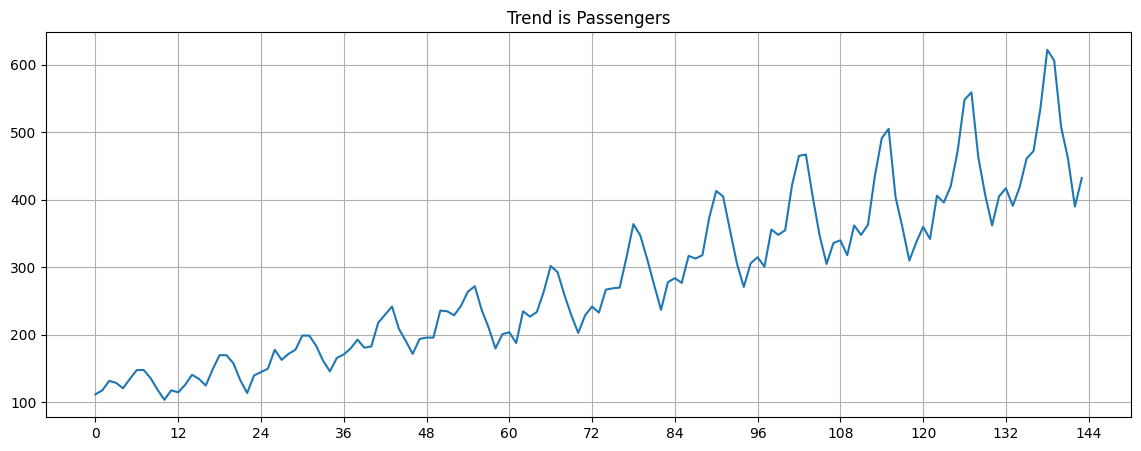

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(air_passenger)
plt.xticks(range(0, 145, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [7]:
model = ARIMA(air_passenger, order=(5, 3, 4))

In [8]:
output = model.fit()

In [9]:
forecast = output.get_forecast(steps=12)

In [10]:
forecast.predicted_mean

144    463.555882
145    441.960902
146    394.576946
147    332.577191
148    302.600253
149    322.219707
150    348.106934
151    336.060851
152    281.473072
153    218.413370
154    191.378073
155    208.014645
Name: predicted_mean, dtype: float64

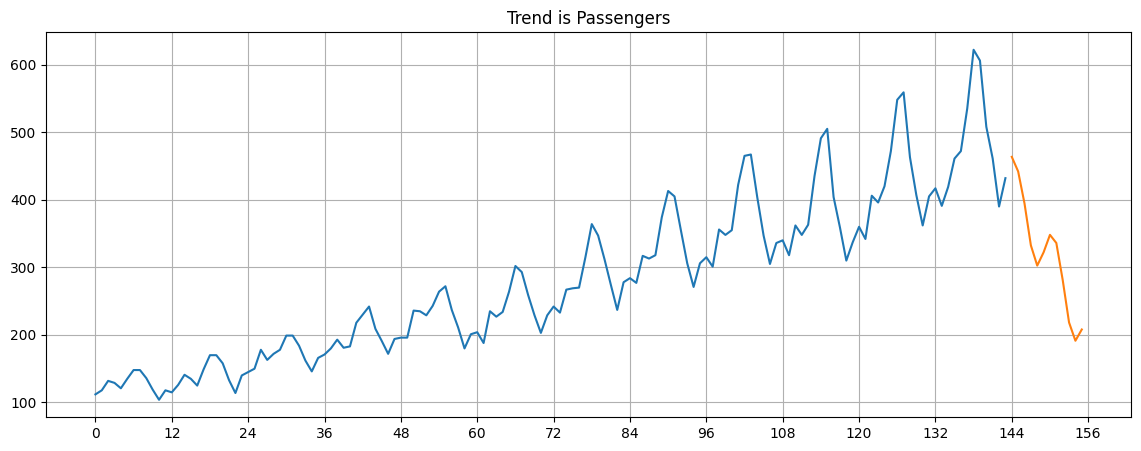

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0, 157, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [12]:
error = output.aic

In [13]:
error

1392.9257115654982

In [14]:
best_order = None
min_aic = np.inf

In [15]:
for p in range(8, 13):
    for d in range(1, 4):
        for q in range(5, 10):
            m = ARIMA(air_passenger, order=(p, d, q))
            res = m.fit()

            if res.aic < min_aic:
                min_aic = res.aic
                best_order = (p, d, q)

In [16]:
best_order

(11, 2, 7)

In [17]:
min_aic

1140.0681703149726

In [18]:
model = ARIMA(air_passenger, order=best_order)

In [19]:
result = model.fit()

In [26]:
forecast = result.get_forecast(steps = 36)

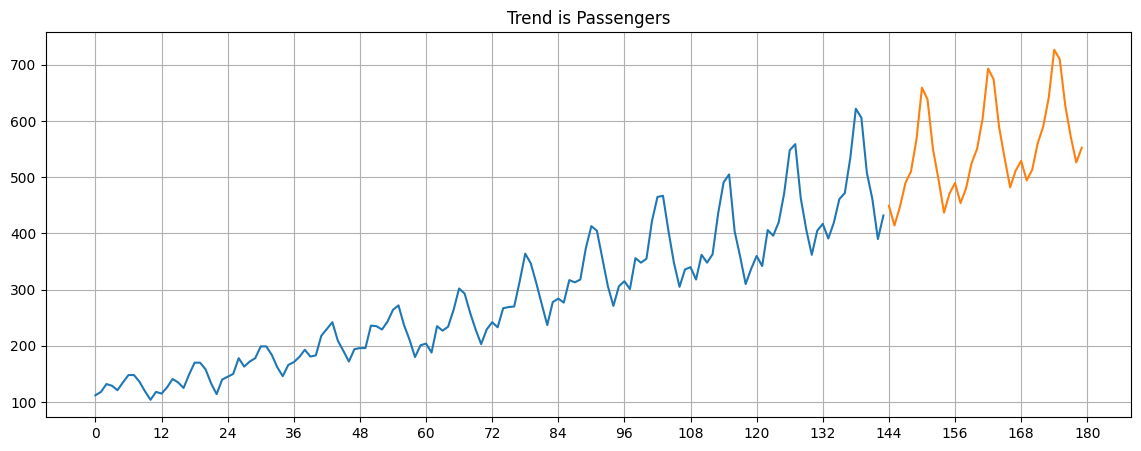

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0, 181, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [28]:
forecast.predicted_mean

144    449.345341
145    414.253840
146    447.239271
147    489.853861
148    510.298999
149    567.316199
150    659.307322
151    638.903312
152    549.684934
153    496.324680
154    437.053461
155    471.172250
156    489.822295
157    454.082026
158    480.212674
159    524.853658
160    550.609138
161    603.978286
162    693.405538
163    674.316091
164    589.040399
165    533.892267
166    482.077960
167    511.745207
168    529.181183
169    494.391883
170    513.241742
171    560.403656
172    590.176726
173    641.430444
174    726.874262
175    710.062949
176    627.920892
177    572.111051
178    526.428211
179    552.575136
Name: predicted_mean, dtype: float64